The advertising data was taken from http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("C:\\Users\\swami\\Desktop\Advertising.csv")
TV=np.array(data['TV'])
radio=np.array(data['radio'])
newspaper=np.array(data['newspaper'])
sales=np.array(data['sales'])

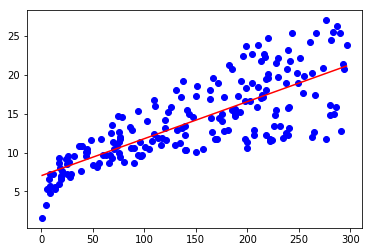

rvalue 0.7822244248616064


In [3]:
#linear regression TV ~ Sales
gradient, intercept, r_value, p_value, std_err = stats.linregress(TV,sales)
mn=np.min(TV)
mx=np.max(TV)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(TV,sales,'ob')
plt.plot(x1,y1,'-r')
plt.show()
print("rvalue",r_value)

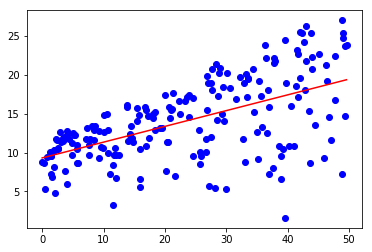

rvalue 0.5762225745710553


In [4]:

#linear regression radio ~ Sales
gradient, intercept, r_value, p_value, std_err = stats.linregress(radio,sales)
mn=np.min(radio)
mx=np.max(radio)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(radio,sales,'ob')
plt.plot(x1,y1,'-r')
plt.show()
print("rvalue",r_value)

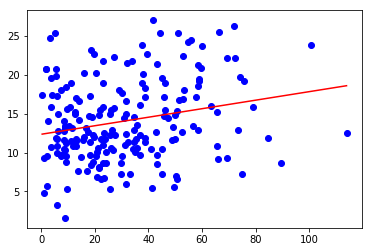

rvalue 0.22829902637616534


In [5]:

#linear regression newspaper ~ Sales
gradient, intercept, r_value, p_value, std_err = stats.linregress(newspaper,sales)
mn=np.min(newspaper)
mx=np.max(newspaper)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(newspaper,sales,'ob')
plt.plot(x1,y1,'-r')
plt.show()
print("rvalue",r_value)

# Multivariable linear regression

In [6]:


X = data[['TV','newspaper','radio']]
Y = data['sales']
 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 2.9388893694594103
Coefficients: 
 [ 0.04576465 -0.00103749  0.18853002]


# Including interaction terms

In [7]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X1 = poly.fit_transform(X)
regex = LinearRegression().fit(X1,Y)
print('R-squared coeff for new model = ',regex.score(X1,Y))
print(regex.coef_,regex.intercept_)

R-squared coeff for new model =  0.9686311066255571
[ 0.00000000e+00  2.03270962e-02  1.70339370e-02  2.29291894e-02
 -7.97143541e-05  1.13928001e-03 -1.09597607e-04] 6.460158489941947


In [8]:
X2 = X1[:,[0,1,2,3,5,6]]
regnew = LinearRegression().fit(X2,Y)
print('R-squared coeff for new model = ',regnew.score(X2,Y))
print(regnew.coef_,regnew.intercept_)


R-squared coeff for new model =  0.9678248777901788
[ 0.00000000e+00  1.90503966e-02  2.31781210e-03  2.88071453e-02
  1.08776349e-03 -2.97334345e-05] 6.708184657905641


sales=6.70+0.25*TV+0.115*newspaper+0.389*radio+0.053*TV*newspaper-0.019*TV*radio